<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Practice/Practicing_CNN_for_Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Download the Dataset**

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-09-22 17:35:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 209.85.200.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  54.9MB/s    in 1.2s    

2020-09-22 17:35:03 (54.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



# 2. Extract the Dataset 

In [3]:
import os
import zipfile

zip_ref = os.path.join('/tmp/cats_and_dogs_filtered.zip')
zip_ref = zipfile.ZipFile(zip_ref, 'r')

zip_ref.extractall('/tmp/')
zip_ref.close()


# 3. Set the path and check the file size

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

valid_dogs_dir = os.path.join(valid_dir, 'dogs')
valid_cats_dir = os.path.join(valid_dir, 'cats')

train_dog_fnames = os.listdir(train_dogs_dir)
train_cat_fnames = os.listdir(train_cats_dir)

valid_dog_fnames = os.listdir(valid_dogs_dir)
valid_cat_fnames = os.listdir(valid_cats_dir)

print("no of training dog images : {}".format(len(train_dog_fnames)))
print("no of training cat images : {}".format(len(train_cat_fnames)))

print("no of validation dog images : {}".format(len(valid_dog_fnames)))
print("no of validation cat images : {}".format(len(valid_cat_fnames)))

no of training dog images : 1000
no of training cat images : 1000
no of validation dog images : 500
no of validation cat images : 500


# **4. Visualize the Dataset**

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 0 
n_rows = 4
n_cols = 4


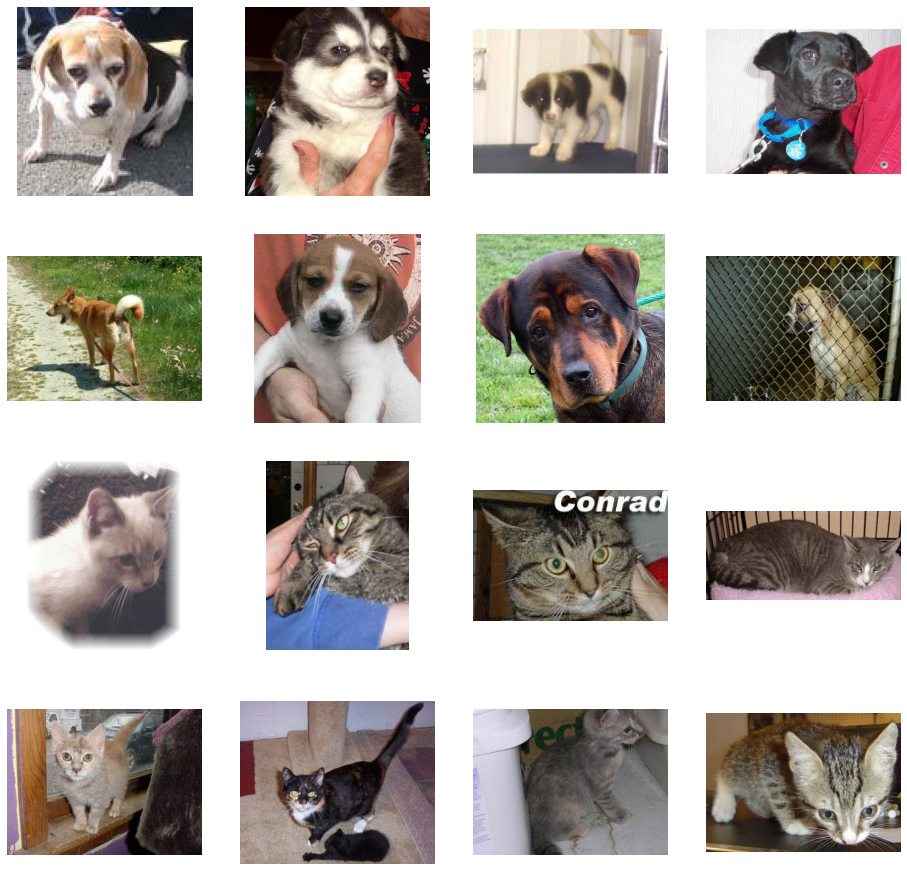

In [6]:
fig = plt.gcf()
fig.set_size_inches(n_rows*4, n_cols*4)

index += 8

dog_images = [os.path.join(train_dogs_dir, fname) for fname in 
              train_dog_fnames[index-8 : index]]
cat_images = [os.path.join(train_cats_dir, fname) for fname in 
              train_cat_fnames[index-8 : index]]

for i, image in enumerate(dog_images + cat_images):
    sp = plt.subplot(n_rows, n_cols, i+1)
    sp.axis('off')

    img = mpimg.imread(image)
    plt.imshow(img)

plt.show()


# 5. Data Preprocessing

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator



In [8]:
train_datagen = ImageDataGenerator(rescale=1/255.)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    target_size=(150, 150),
    class_mode='binary'
)

valid_datagen = ImageDataGenerator(rescale=1/255.)

valid_dataset = valid_datagen.flow_from_directory(
    valid_dir,
    batch_size=20,
    target_size=(150, 150),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **6. Creating a Model**

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', 
                        input_shape=[150, 150, 3]),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=["accuracy"])

# 7. Training the Model

In [11]:
history = model.fit(train_dataset,
          epochs=15,
          validation_data=valid_dataset,
          verbose=1)

Epoch 1/15
100/100 [==============================] - 10s 97ms/step - loss: 0.7034 - accuracy: 0.5920 - val_loss: 0.7180 - val_accuracy: 0.5570
Epoch 2/15
100/100 [==============================] - 9s 95ms/step - loss: 0.5977 - accuracy: 0.6875 - val_loss: 0.5681 - val_accuracy: 0.7000
Epoch 3/15
100/100 [==============================] - 10s 95ms/step - loss: 0.5313 - accuracy: 0.7410 - val_loss: 0.5773 - val_accuracy: 0.6950
Epoch 4/15
100/100 [==============================] - 9s 95ms/step - loss: 0.4696 - accuracy: 0.7750 - val_loss: 0.5453 - val_accuracy: 0.7380
Epoch 5/15
100/100 [==============================] - 10s 96ms/step - loss: 0.4065 - accuracy: 0.8260 - val_loss: 0.5340 - val_accuracy: 0.7500
Epoch 6/15
100/100 [==============================] - 9s 95ms/step - loss: 0.3251 - accuracy: 0.8625 - val_loss: 0.6697 - val_accuracy: 0.6980
Epoch 7/15
100/100 [==============================] - 9s 94ms/step - loss: 0.2627 - accuracy: 0.8900 - val_loss: 0.6681 - val_accuracy: 0.7

# 8. Plotting the Loss and Accuracy Curves

Text(0.5, 1.0, 'Training & Validation Loss')

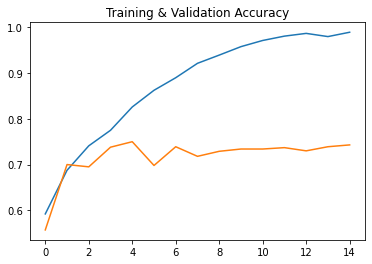

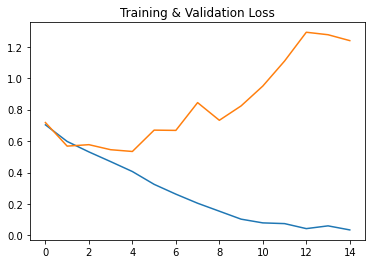

In [14]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training & Validation Accuracy")

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training & Validation Loss")

# **9. Addressing the problem of Overfitting**

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_dataset = train_datagen.flow_from_directory(
    train_dir, 
    batch_size=20,
    target_size=(150, 150),
    class_mode='binary'
)

valid_datagen = ImageDataGenerator(
    rescale=1/255.,
)

valid_dataset = valid_datagen.flow_from_directory(
    valid_dir, 
    batch_size=20,
    target_size=(150, 150),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
history = model.fit(train_dataset,
          epochs=15,
          validation_data=valid_dataset,
          verbose=1)

Epoch 1/15
100/100 [==============================] - 19s 192ms/step - loss: 0.7353 - accuracy: 0.5195 - val_loss: 0.6772 - val_accuracy: 0.5310
Epoch 2/15
100/100 [==============================] - 19s 189ms/step - loss: 0.6866 - accuracy: 0.5830 - val_loss: 0.6396 - val_accuracy: 0.6290
Epoch 3/15
100/100 [==============================] - 19s 187ms/step - loss: 0.6534 - accuracy: 0.6240 - val_loss: 0.6034 - val_accuracy: 0.6940
Epoch 4/15
100/100 [==============================] - 19s 189ms/step - loss: 0.6450 - accuracy: 0.6415 - val_loss: 0.5818 - val_accuracy: 0.6800
Epoch 5/15
100/100 [==============================] - 19s 188ms/step - loss: 0.6250 - accuracy: 0.6540 - val_loss: 0.5876 - val_accuracy: 0.6730
Epoch 6/15
100/100 [==============================] - 19s 188ms/step - loss: 0.6176 - accuracy: 0.6700 - val_loss: 0.5790 - val_accuracy: 0.6780
Epoch 7/15
100/100 [==============================] - 19s 189ms/step - loss: 0.6089 - accuracy: 0.6760 - val_loss: 0.5602 - val_ac

Text(0.5, 1.0, 'Training & Validation Loss')

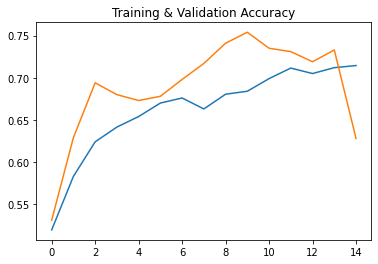

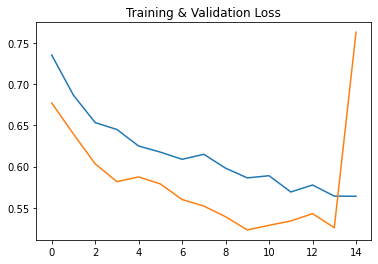

In [23]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training & Validation Accuracy")

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training & Validation Loss")